Jr Data Scientist - Evaluation -1 

Part 1 (Three Questions)

Question  1-
 Write a regex to extract all the numbers with orange color background from the below text in italics.


{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}


Answer 1

In [65]:
dict={"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},
           {"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},
           {"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}
m = []
for i in dict.values():
  for j in i:
    for k in j.values():
      if type(k) == int:
        m.append(k)
print(m)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 648, 649, 650, 651, 652, 653, 3]






Part 2 

1. Train a machine learning model (preferably with a neural network) that 
predicts the customer who is going to be checked in. Once done, please test 
the prediction with below test data.


Part 2-1 Training a machine learning model ( with a neural network) 

In [66]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/room/train_data_evaluation_part_2.csv')
data.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
data.columns

Index(['Unnamed: 0', 'ID', 'Nationality', 'Age', 'DaysSinceCreation',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

cheking null values

In [68]:
data.isnull().sum()

Unnamed: 0                 0
ID                         0
Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [69]:
data=data.dropna(axis=0)

In [70]:
X_train=data.drop(['BookingsCheckedIn','Unnamed: 0','ID'],axis=1)
y_train=data['BookingsCheckedIn']
y_train_=data['BookingsCheckedIn']

X_train.Nationality.unique()

array(['PRT', 'DEU', 'FRA', 'JPN', 'IRL', 'ESP', 'BEL', 'NLD', 'AUT',
       'ITA', 'CHN', 'RUS', 'POL', 'USA', 'HUN', 'CRI', 'MEX', 'CHE',
       'ROU', 'GBR', 'BIH', 'BRA', 'FIN', 'AGO', 'CAN', 'ZAF', 'TWN',
       'GRC', 'AUS', 'ISR', 'BGR', 'SAU', 'SWE', 'CYP', 'ARG', 'ARM',
       'CHL', 'MAR', 'MOZ', 'KOR', 'TUN', 'DNK', 'NOR', 'MYS', 'EGY',
       'IND', 'HRV', 'CPV', 'JOR', 'COD', 'DZA', 'LUX', 'TUR', 'IRN',
       'LBY', 'PAN', 'COL', 'VEN', 'GNB', 'CZE', 'AND', 'SVN', 'PER',
       'ATF', 'UGA', 'AZE', 'NZL', 'LTU', 'SRB', 'EST', 'KAZ', 'KWT',
       'IDN', 'UKR', 'SVK', 'MLI', 'ARE', 'BGD', 'THA', 'TZA', 'LVA',
       'PHL', 'BHR', 'NAM', 'BOL', 'SGP', 'CMR', 'MLT', 'URY', 'PAK',
       'JAM', 'ECU', 'SYC', 'QAT', 'PRY', 'BRB', 'OMN', 'TMP', 'ABW',
       'LBN', 'AIA', 'SLV', 'DMA', 'CUB', 'VNM', 'GEO', 'IRQ', 'GAB',
       'PYF', 'LIE', 'SEN', 'BLR', 'ISL', 'DOM', 'GUY', 'LCA', 'ATA',
       'NGA', 'RWA', 'CIV', 'ALB', 'MKD', 'MNE', 'GTM', 'GHA', 'MDV',
       'MCO', 'MUS',

In [71]:
#fiding object columns
X_train.dtypes

Nationality              object
Age                     float64
DaysSinceCreation         int64
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

Labelencoding

In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_train['Nationality']=le.fit_transform(data.Nationality)
X_train['DistributionChannel']=le.fit_transform(data.DistributionChannel)
X_train['MarketSegment']=le.fit_transform(data.MarketSegment)




In [73]:
X_train.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,137,51.0,150,45,371.0,105.3,1,0,8,5,...,0,0,0,0,0,0,0,0,0,0
2,43,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57,60.0,1095,93,240.0,60.0,0,0,10,5,...,0,0,0,0,0,0,0,0,0,0
4,57,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,87,54.0,1095,58,230.0,24.0,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0


Feature selection process

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
# Using pearson Correlation
plt.figure(figsize=(20,20))
cor=X_train.corr()
cor

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
Nationality,1.000000,-0.021947,0.006405,-0.092727,-0.027605,-0.043117,0.029622,0.019452,-0.067716,-0.036468,...,0.008491,0.002250,-0.005314,0.006604,-0.004773,-0.019670,0.004269,0.003779,0.000224,-0.049156
Age,-0.021947,1.000000,0.125970,0.251712,0.051373,0.116581,0.004446,0.006721,0.110803,0.130274,...,0.007169,-0.017266,0.010652,-0.117421,-0.003077,0.013670,0.012988,0.009559,-0.010679,0.014094
DaysSinceCreation,0.006405,0.125970,1.000000,0.134294,0.090162,0.157007,0.016700,0.012102,0.243975,0.241511,...,0.006484,-0.009585,-0.005274,-0.035947,-0.025467,-0.022719,-0.001697,0.011394,-0.011354,-0.049042
AverageLeadTime,-0.092727,0.251712,0.134294,1.000000,0.217474,0.242221,-0.014656,-0.011521,0.350210,0.327600,...,-0.000850,-0.007210,0.008272,-0.040311,-0.017878,0.078178,0.000143,-0.000295,-0.006525,0.007338
LodgingRevenue,-0.027605,0.051373,0.090162,0.217474,1.000000,0.537068,0.063528,0.060418,0.655173,0.674279,...,0.005677,0.003203,0.012062,-0.017372,0.009343,0.006604,0.004302,0.011950,-0.001103,0.052833
OtherRevenue,-0.043117,0.116581,0.157007,0.242221,0.537068,1.000000,0.044486,0.033859,0.536998,0.489000,...,0.007840,0.007853,0.011885,0.001678,0.011037,0.012283,0.001084,0.012175,0.005068,0.016855
BookingsCanceled,0.029622,0.004446,0.016700,-0.014656,0.063528,0.044486,1.000000,0.328430,0.087482,0.195653,...,0.024849,-0.001511,-0.001194,-0.003221,0.018618,-0.008244,-0.000501,0.004680,-0.000317,-0.005543
BookingsNoShowed,0.019452,0.006721,0.012102,-0.011521,0.060418,0.033859,0.328430,1.000000,0.064727,0.150714,...,-0.000611,-0.001101,-0.000870,-0.002346,0.012653,-0.002042,-0.000365,-0.001234,-0.000231,-0.003362
PersonsNights,-0.067716,0.110803,0.243975,0.350210,0.655173,0.536998,0.087482,0.064727,1.000000,0.870884,...,0.005930,0.016028,0.013918,-0.011391,0.036495,0.000737,0.000633,0.014605,-0.002255,0.031166
RoomNights,-0.036468,0.130274,0.241511,0.327600,0.674279,0.489000,0.195653,0.150714,0.870884,1.000000,...,0.006768,0.015321,0.012264,-0.033840,0.021222,-0.028343,0.000753,0.015367,-0.001986,0.020584


<Figure size 1440x1440 with 0 Axes>

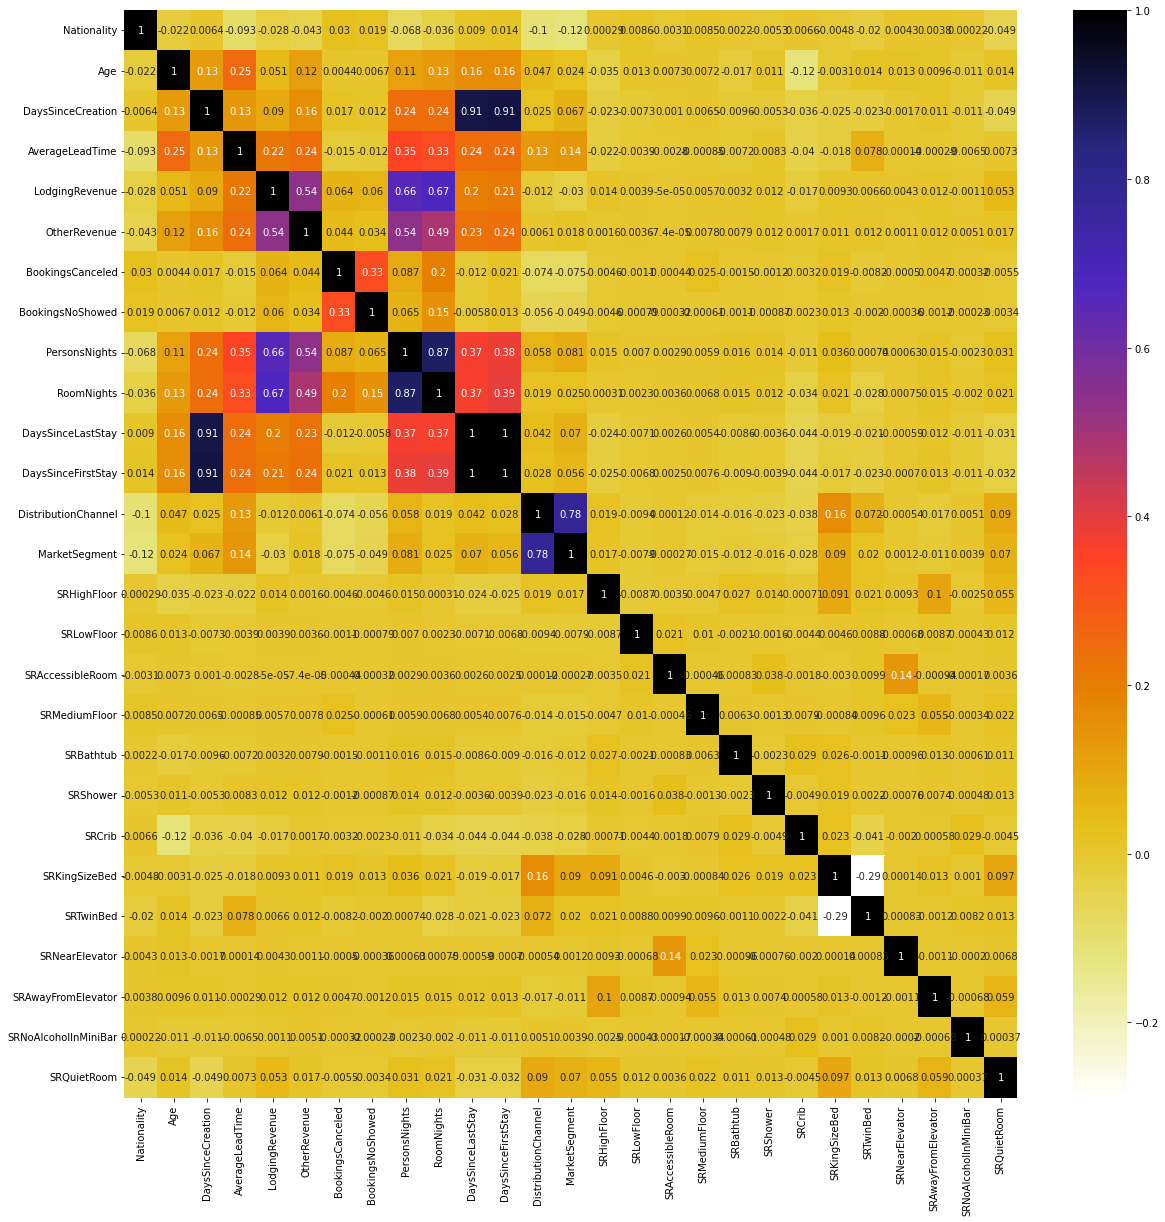

In [75]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [76]:
#with the following function we can select highly correlated features
#it will remove the first features that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [77]:
corr_features= correlation(X_train,.85)
len(set(corr_features))

3

In [78]:
corr_features

{'DaysSinceFirstStay', 'DaysSinceLastStay', 'RoomNights'}

In [79]:
X_train=X_train.drop(corr_features,axis=1)

Feature Selection- Dropping constant features

In [80]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=1)
var_thres.fit(X_train)

VarianceThreshold(threshold=1)

In [81]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [82]:
print(len(X_train.columns[var_thres.get_support()]))
X_train.columns[var_thres.get_support()]


8


Index(['Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'PersonsNights', 'MarketSegment'],
      dtype='object')

In [83]:
constant_columns=[]
for column in X_train.columns:
  if column not in X_train.columns[var_thres.get_support()]:
    constant_columns.append(column)
print(constant_columns)

['BookingsCanceled', 'BookingsNoShowed', 'DistributionChannel', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']


In [84]:
X_train = X_train.drop(constant_columns,axis=1)
X_train.head(3)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,MarketSegment
0,137,51.0,150,45,371.0,105.3,8,2
2,43,31.0,1095,0,0.0,0.0,0,6
3,57,60.0,1095,93,240.0,60.0,10,6


In [85]:
crr=X_train.corr()
crr

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,MarketSegment
Nationality,1.000000,-0.021947,0.006405,-0.092727,-0.027605,-0.043117,-0.067716,-0.117791
Age,-0.021947,1.000000,0.125970,0.251712,0.051373,0.116581,0.110803,0.023954
DaysSinceCreation,0.006405,0.125970,1.000000,0.134294,0.090162,0.157007,0.243975,0.067345
AverageLeadTime,-0.092727,0.251712,0.134294,1.000000,0.217474,0.242221,0.350210,0.135336
LodgingRevenue,-0.027605,0.051373,0.090162,0.217474,1.000000,0.537068,0.655173,-0.029858
OtherRevenue,-0.043117,0.116581,0.157007,0.242221,0.537068,1.000000,0.536998,0.017709
PersonsNights,-0.067716,0.110803,0.243975,0.350210,0.655173,0.536998,1.000000,0.080923
MarketSegment,-0.117791,0.023954,0.067345,0.135336,-0.029858,0.017709,0.080923,1.000000


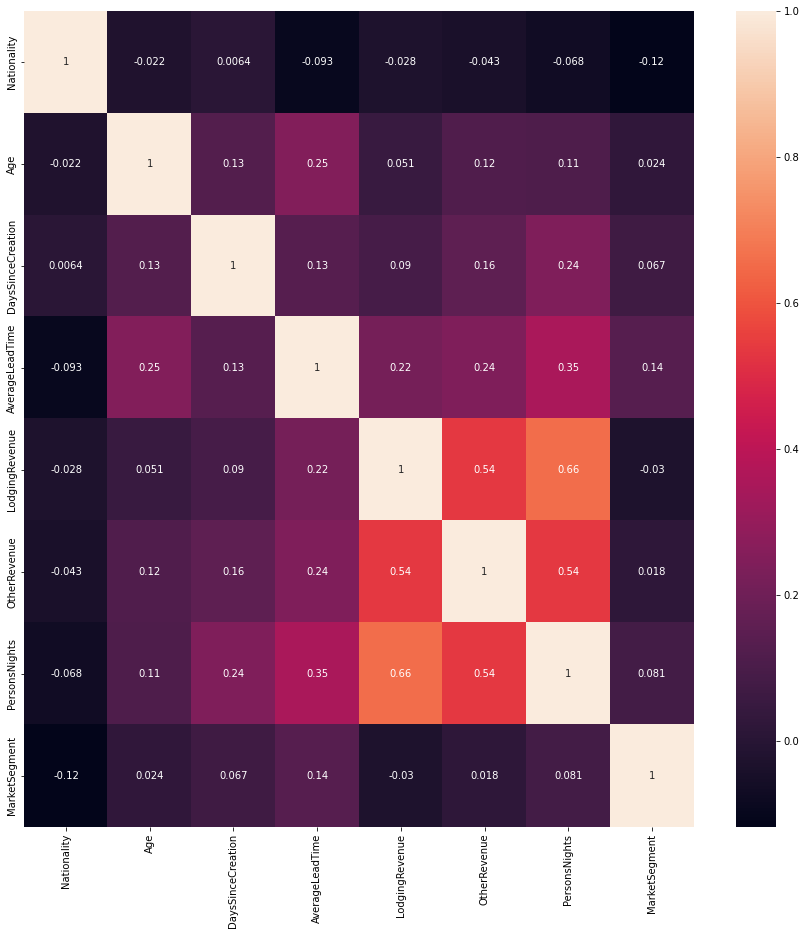

In [86]:
plt.figure(figsize=(15,15))
sns.heatmap(crr,annot=True)

In [87]:
X_train.Nationality.var()

2013.3534655100789

In [88]:
# checking correlation of X_train columns with target


In [89]:
print(X_train.Nationality.corr(y_train))
print(X_train.Age.corr(y_train))
print(X_train.DaysSinceCreation.corr(y_train))
print(X_train.AverageLeadTime.corr(y_train))
print(X_train.LodgingRevenue.corr(y_train))
print(X_train.OtherRevenue.corr(y_train))
print(X_train.PersonsNights.corr(y_train))
# print(X_train.RoomNights.corr(y_train))
print(X_train.MarketSegment.corr(y_train))



0.05097212987709525
0.13047448355756677
0.2722847935134769
0.24304840611062184
0.40600646735424506
0.3027911845890763
0.4869313470477463
-0.07576843815490437


In [90]:
#hear we have to remove columns that if corelation is lesthan near to 0
#hear we have to remove two columns
X_train=X_train.drop(['Nationality','MarketSegment'],axis=1)
X_train.head(4)

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights
0,51.0,150,45,371.0,105.3,8
2,31.0,1095,0,0.0,0.0,0
3,60.0,1095,93,240.0,60.0,10
4,51.0,1095,0,0.0,0.0,0


In [91]:
X_train.isnull().sum()

Age                  0
DaysSinceCreation    0
AverageLeadTime      0
LodgingRevenue       0
OtherRevenue         0
PersonsNights        0
dtype: int64

In [92]:
# this data i have already created befor
final_data=pd.read_csv('/content/drive/MyDrive/room/data_vz.csv')
crr4=final_data.corr()
crr4

,Unnamed: 0,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCheckedIn,PersonsNights
Unnamed: 0,1.000000,-0.128368,-0.986776,-0.146148,-0.099166,-0.163090,-0.279482,-0.252845
Age,-0.128368,1.000000,0.125970,0.251712,0.051373,0.116581,0.130474,0.110803
DaysSinceCreation,-0.986776,0.125970,1.000000,0.134294,0.090162,0.157007,0.272285,0.243975
AverageLeadTime,-0.146148,0.251712,0.134294,1.000000,0.217474,0.242221,0.243048,0.350210
LodgingRevenue,-0.099166,0.051373,0.090162,0.217474,1.000000,0.537068,0.406006,0.655173
OtherRevenue,-0.163090,0.116581,0.157007,0.242221,0.537068,1.000000,0.302791,0.536998
BookingsCheckedIn,-0.279482,0.130474,0.272285,0.243048,0.406006,0.302791,1.000000,0.486931
PersonsNights,-0.252845,0.110803,0.243975,0.350210,0.655173,0.536998,0.486931,1.000000


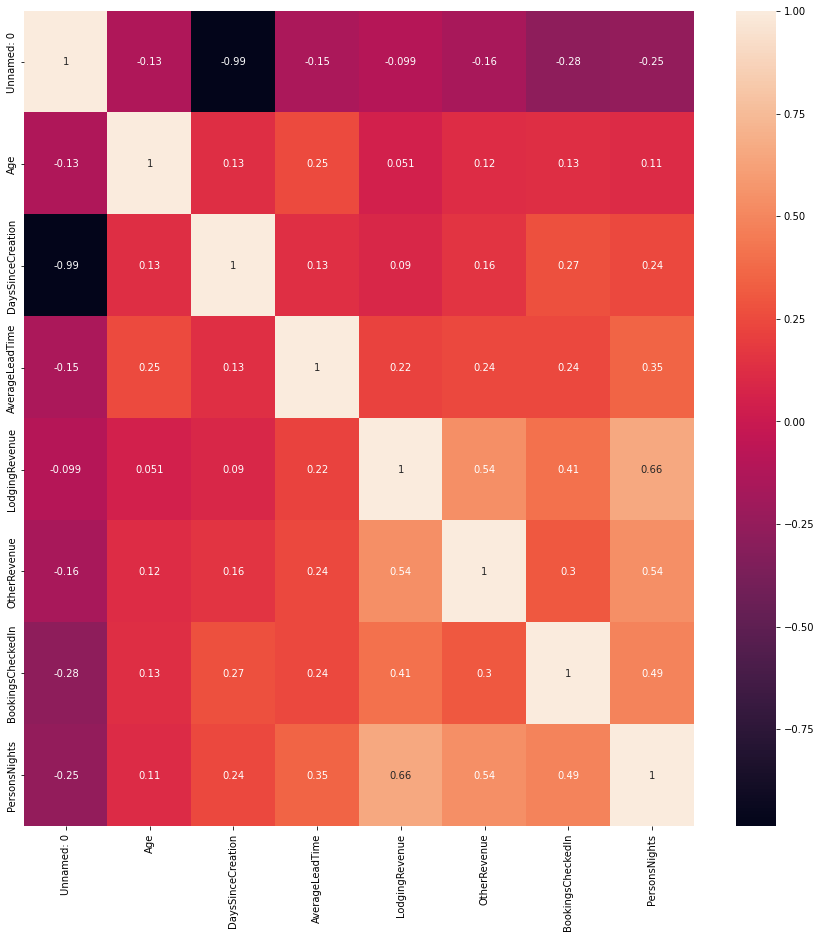

In [93]:
plt.figure(figsize=(15,15))
sns.heatmap(crr4,annot=True)

setting testing Datax

In [94]:
X_test=pd.read_csv('/content/drive/MyDrive/room/test_data_evaluation_part2.csv')
X_test.head(1)

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
X_test.isnull().sum()

Unnamed: 0               0
ID                       0
Nationality              0
Age                     33
DaysSinceCreation        0
AverageLeadTime          0
LodgingRevenue           0
OtherRevenue             0
BookingsCanceled         0
BookingsNoShowed         0
BookingsCheckedIn        0
PersonsNights            0
RoomNights               0
DaysSinceLastStay        0
DaysSinceFirstStay       0
DistributionChannel      0
MarketSegment            0
SRHighFloor              0
SRLowFloor               0
SRAccessibleRoom         0
SRMediumFloor            0
SRBathtub                0
SRShower                 0
SRCrib                   0
SRKingSizeBed            0
SRTwinBed                0
SRNearElevator           0
SRAwayFromElevator       0
SRNoAlcoholInMiniBar     0
SRQuietRoom              0
dtype: int64

In [96]:
X_test=X_test.dropna(axis=0)
X_test.head(1)

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
scp_columns=[]
for column in X_test.columns:
  if column not in  X_train:
    scp_columns.append(column)
y_test=X_test['BookingsCheckedIn']
y_test_=y_test

X_test=X_test.drop(scp_columns,axis=1)
X_test_=X_test

X_test

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights
0,47.0,11,0,0.00,0.0,0
1,16.0,11,130,483.48,155.1,15
2,15.0,11,0,0.00,0.0,0
3,12.0,11,0,0.00,0.0,0
5,42.0,11,1,59.00,7.0,1
...,...,...,...,...,...,...
995,54.0,0,0,0.00,0.0,0
996,47.0,0,109,327.10,277.5,6
997,53.0,0,0,0.00,0.0,0
998,85.0,0,109,981.30,9.0,6


features scalling using stanterd scaler

In [98]:
from sklearn.preprocessing import StandardScaler
X_train_=X_train
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_test)



[[ 0.09266792 -1.42899819 -0.7619431  -0.82466183 -0.60516558 -1.02953549]
 [-1.78314471 -1.42899819  0.71267353  0.48762526  0.77007672  2.24427723]
 [-1.8436548  -1.42899819 -0.7619431  -0.82466183 -0.60516558 -1.02953549]
 ...
 [ 0.45572843 -1.46464488 -0.7619431  -0.82466183 -0.60516558 -1.02953549]
 [ 2.39205114 -1.46464488  0.47446622  1.83883475 -0.52536429  0.2799896 ]
 [-1.96467497 -1.46464488 -0.7619431  -0.82466183 -0.60516558 -1.02953549]]


In [99]:
list_1=[]
for i in y_train:
  if i >=1:
    list_1.append(1)
  else:
    list_1.append(0)

list_2=[]
for i in y_test:
  if i >=1:
    list_2.append(1)
  else:
    list_2.append(0)  

y_train=list_1
y_test=list_2
y_train[:4]

[1, 0, 1, 0]

In [100]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,RMSprop

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix


In [101]:
model=Sequential()
model.add(Dense(150,input_dim=6,activation='relu',kernel_initializer='uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='uniform'))
model.add(Dense(50,activation='relu',kernel_initializer='uniform'))

model.add(Dense(1,activation='sigmoid'))

In [102]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 150)               1050      
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
 dense_6 (Dense)             (None, 50)                550       
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,161
Trainable params: 3,161
Non-trainable params: 0
_________________________________________________________________


In [103]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [104]:
training_history=model.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
789/789 [==============================] - 3s 3ms/step - loss: 0.0251 - accuracy: 0.9890 - val_loss: 2.5870e-05 - val_accuracy: 1.0000
Epoch 2/10
789/789 [==============================] - 2s 3ms/step - loss: 3.2902e-05 - accuracy: 1.0000 - val_loss: 2.8699e-06 - val_accuracy: 1.0000
Epoch 3/10
789/789 [==============================] - 2s 3ms/step - loss: 0.0218 - accuracy: 0.9955 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 4/10
789/789 [==============================] - 2s 3ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 5.4222e-04 - val_accuracy: 1.0000
Epoch 5/10
789/789 [==============================] - 2s 3ms/step - loss: 1.6102e-04 - accuracy: 1.0000 - val_loss: 1.8343e-04 - val_accuracy: 1.0000
Epoch 6/10
789/789 [==============================] - 2s 3ms/step - loss: 6.2733e-05 - accuracy: 1.0000 - val_loss: 8.6911e-05 - val_accuracy: 1.0000
Epoch 7/10
789/789 [==============================] - 2s 3ms/step - loss: 3.1803e-05 - accuracy: 1.0000 - val_loss: 

In [105]:
hist=training_history.history
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [106]:
hist['accuracy'][-1]

1.0

In [107]:
hist['loss'][-1]

6.4982104959199205e-06

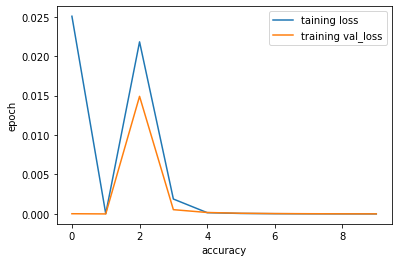

In [108]:
plt.plot(hist['loss'],label='taining loss')
plt.plot(hist['val_loss'],label='training val_loss')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend()

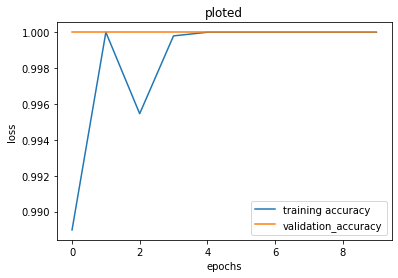

In [109]:
plt.plot(hist['accuracy'],label='training accuracy')
plt.plot(hist['val_accuracy'],label='validation_accuracy')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('ploted')
plt.legend()

In [110]:
predict=model.predict([X_test])


creating model using ML algorithum

In [111]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [112]:
new_data=pd.read_csv('/content/drive/MyDrive/room/data_vz.csv')
new_data.head(5)

,Unnamed: 0,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCheckedIn,PersonsNights
0,0,51.0,150,45,371.0,105.3,3,8
1,2,31.0,1095,0,0.0,0.0,0,0
2,3,60.0,1095,93,240.0,60.0,1,10
3,4,51.0,1095,0,0.0,0.0,0,0
4,5,54.0,1095,58,230.0,24.0,1,4


In [113]:
X_train=new_data.drop('BookingsCheckedIn',axis=1)
X_train=X_train.drop('Unnamed: 0',axis=1)
y_train=new_data['BookingsCheckedIn']

In [114]:
test_data=pd.read_csv('/content/drive/MyDrive/room/test_data_evaluation_part2.csv')
test_data=test_data.dropna(axis=0)
w_data=[]
for column in test_data.columns:
  if column not in X_train:
    w_data.append(column)
X_test=test_data.drop(w_data,axis=1)
y_test=test_data['BookingsCheckedIn']


list_1=[]
for i in y_train:
  if i >=1:
    list_1.append(1)
  else:
    list_1.append(0)

list_2=[]
for i in y_test:
  if i >=1:
    list_2.append(1)
  else:
    list_2.append(0)  

y_train=list_1
y_test=list_2
y_train[:4]

[1, 0, 1, 0]

In [115]:
model_params={'svm':{'model':SVC(gamma='auto'),'params':{'C':[1,10,20],'kernel':['rbf','linear']}},
             'RandomForestClassifier':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,5,10]}},
             'LogisticRegression':{'model':LogisticRegression(),'params':{'C':[1,5,10]}}}

In [116]:
# list_score=[]
# list_model=['svm','RandomForestClassifier','LogisticRegression']
# for model_name in list_model:
#     mp=model_params[model_name]
#     gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
#     gds.fit(X_train,y_train)
#     list_score.append({'model_name':model_name,'score':gds.best_score_,'best_params':gds.best_params_})

In [117]:
# list_score

In [118]:
model=SVC(C=10,kernel='rbf')
model.fit(X_train,y_train)

SVC(C=10)

In [125]:
predict=model.predict(X_test)

In [126]:
comparison=pd.DataFrame(predict,y_test)
comparison.head()

,0
0,0
1,1
0,0
0,0
1,1


In [127]:
score=model.score(X_test,y_test)
score

0.9896587383660806

In [129]:
import joblib
joblib.dump(model,'svc_check_in.sav')

['svc_check_in.sav']